In [108]:
%load_ext autoreload
%autoreload 2
from perceptron import Perceptron, PerceptronOptimizer
import torch

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Part A: Implementing Perceptron

## Checking Implementation

In [109]:
from matplotlib import pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

torch.manual_seed(1234)

def perceptron_data(n_points, noise, p_dims):
    
    y = torch.arange(n_points) >= int(n_points/2)
    X = y[:, None] + torch.normal(0.0, noise, size = (n_points,p_dims))
    X = torch.cat((X, torch.ones((X.shape[0], 1))), 1)

    # convert y from {0, 1} to {-1, 1}
    y = 2*y - 1
    y = y.type(torch.FloatTensor)

    return X, y

def plot_perceptron_data(X, y, ax):
    assert X.shape[1] == 3, "This function only works for data created with p_dims == 2"
    targets = [-1, 1]
    markers = ["o" , ","]
    for i in range(2):
        ix = y == targets[i]
        ax.scatter(X[ix,0], X[ix,1], s = 20,  c = y[ix], facecolors = "none", edgecolors = "darkgrey", cmap = "BrBG", vmin = -2, vmax = 2, alpha = 0.5, marker = markers[i])
    ax.set(xlabel = r"$x_1$", ylabel = r"$x_2$")
    
def draw_line(w, x_min, x_max, ax, **kwargs):
    w_ = w.flatten()
    x = torch.linspace(x_min, x_max, 101)
    y = -(w_[0]*x + w_[2])/w_[1]
    l = ax.plot(x, y, **kwargs)


Creating a perceptron_data function, which generates data over two quantitative variables and a qualitative feature. Creating a plot_perceptron_data function which visualizes the data created by the perceptron_data function. Creating a draw_line function which visualizes a line on a plot.  

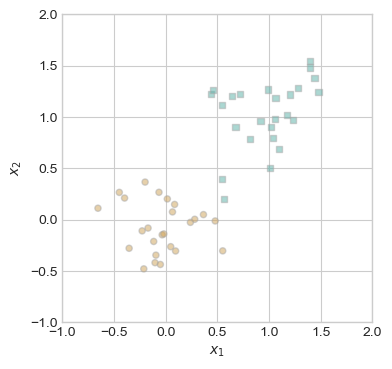

In [110]:
torch.manual_seed(1234)
X, y = perceptron_data(n_points = 50, noise = 0.3, p_dims = 2)
fig, ax = plt.subplots(1, 1, figsize = (4, 4))
ax.set(xlim = (-1, 2), ylim = (-1, 2))
plot_perceptron_data(X, y, ax)

The perceptron data is split into an X feature matrix and a y target vector. The plot shows the linearly separable perceptron data. 

In [111]:
torch.manual_seed(1234)

# instantiate a model and an optimizer
p = Perceptron() 
opt = PerceptronOptimizer(p)

loss = 1.0

# for keeping track of loss values
loss_vec = []

n = X.size()[0]

while loss > 0: # dangerous -- only terminates if data is linearly separable
    
    # not part of the update: just for tracking our progress    
    loss = p.loss(X, y) 
    loss_vec.append(loss)
    
    # pick a random data point
    i = torch.randint(n, size = (1,))
    x_i = X[[i],:]
    y_i = y[i]
    
    # perform a perceptron update using the random data point
    opt.step(x_i, y_i)

The perceptron algorithm is run in a minimal training loop that calls the loss function and the step function until there is zero loss (no misclassifications).

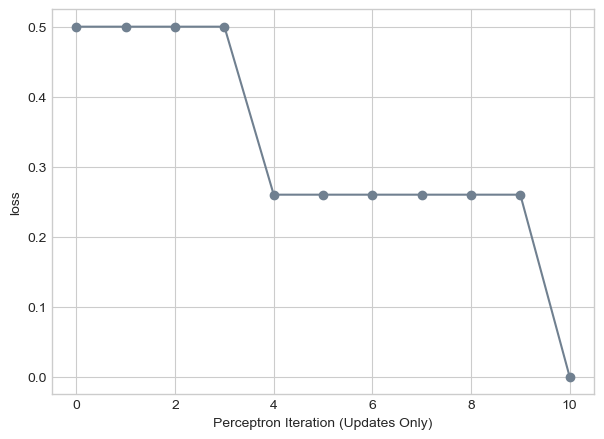

In [112]:
plt.plot(loss_vec, color = "slategrey")
plt.scatter(torch.arange(len(loss_vec)), loss_vec, color = "slategrey")
labs = plt.gca().set(xlabel = "Perceptron Iteration (Updates Only)", ylabel = "loss")

This plot shows the loss over several iterations of the perceptron algorithm. As shown, the loss decreases until it reaches a value of zero. 

## Part B: Experiments

## Using 2D linearly separable data:

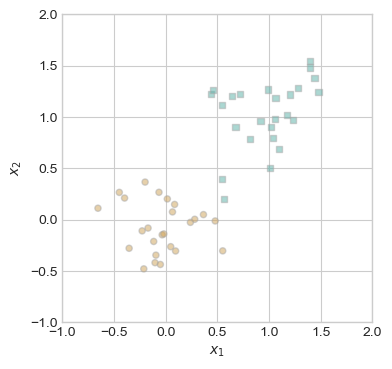

In [113]:
torch.manual_seed(1234)
X, y = perceptron_data(n_points = 50, noise = 0.3, p_dims = 2)
fig, ax = plt.subplots(1, 1, figsize = (4, 4))
ax.set(xlim = (-1, 2), ylim = (-1, 2))
plot_perceptron_data(X, y, ax)

Generating and visualization linearly separable data. 

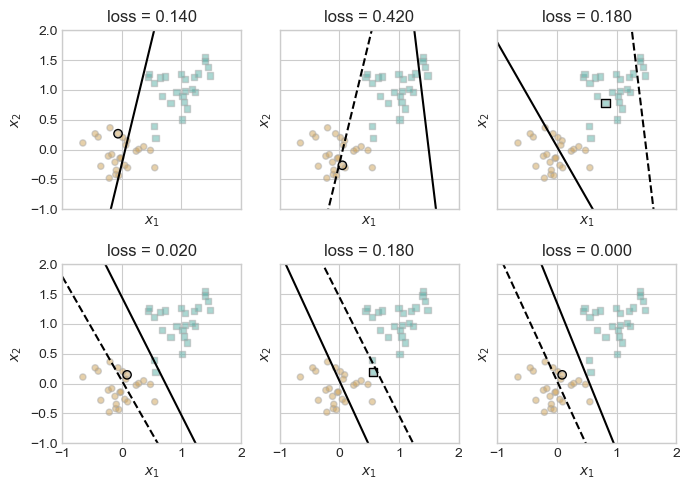

In [114]:
torch.manual_seed(1234567)
# initialize a perceptron 
p = Perceptron()
opt = PerceptronOptimizer(p)
p.loss(X, y)

# set up the figure
plt.rcParams["figure.figsize"] = (7, 5) 
fig, axarr = plt.subplots(2, 3, sharex = True, sharey = True)
markers = ["o", ","]
marker_map = {-1 : 0, 1 : 1}

# initialize for main loop
current_ax = 0
loss = 1
loss_vec = []
maxIterations = 1000
currIteration = 0

while loss > 0 and currIteration < maxIterations:
    ax = axarr.ravel()[current_ax]

    # save the old value of w for plotting later
    old_w = torch.clone(p.w)

    # make an optimization step -- this is where the update actually happens
    # now p.w is the new value 
    randomPoint = torch.randint(X.shape[0], size = (1,))
    X_i = X[[randomPoint],:]
    y_i = y[randomPoint]
    local_loss = opt.step(X_i, y_i)

    # if a change was made, plot the old and new decision boundaries
    # also add the new loss to loss_vec for plotting below
    if local_loss > 0:
        plot_perceptron_data(X, y, ax)
        draw_line(old_w, x_min = -1, x_max = 2, ax = ax, color = "black", linestyle = "dashed")
        loss = p.loss(X, y).item()
        loss_vec.append(loss)
        draw_line(p.w, x_min = -1, x_max = 2, ax = ax, color = "black")
        ax.scatter(X[randomPoint,0],X[randomPoint,1], color = "black", facecolors = "none", edgecolors = "black", marker = markers[marker_map[y[randomPoint].item()]])
        # draw_line(w, -10, 10, ax, color = "black")
        ax.set_title(f"loss = {loss:.3f}")
        ax.set(xlim = (-1, 2), ylim = (-1, 2))
        current_ax += 1
    currIteration += 1
plt.tight_layout()

The perceptron algorithm is run on a training loop that terminates after 1000 iterations. The changes in the loss value are visualized on the plot, showing the previous estimate of a separating line (shown by the dashed line), and the change that the perceptron optimizer made to the separating line (shown by the solid line). The plot shows the final iteration, which resulted in a separating line with zero loss.  

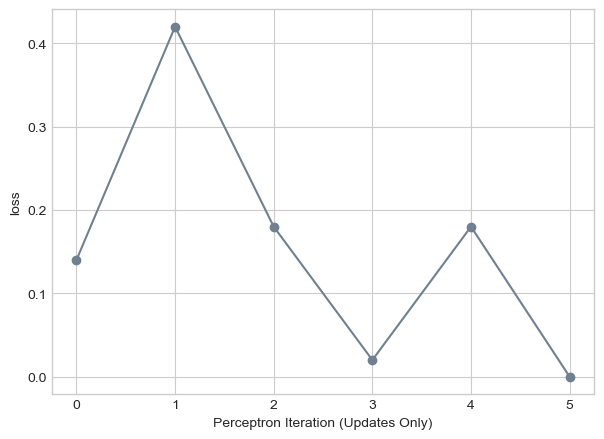

In [115]:
plt.plot(loss_vec, color = "slategrey")
plt.scatter(torch.arange(len(loss_vec)), loss_vec, color = "slategrey")
labs = plt.gca().set(xlabel = "Perceptron Iteration (Updates Only)", ylabel = "loss")

This plot shows the changes in the loss over different iterations of the perceptron algorithm. 

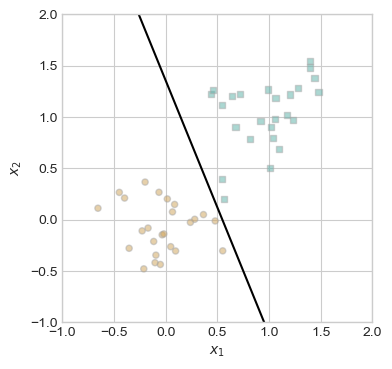

In [116]:
fig, ax = plt.subplots(1, 1, figsize = (4, 4))
ax.set(xlim = (-1, 2), ylim = (-1, 2))
plot_perceptron_data(X, y, ax)
draw_line(p.w, -1, 2, ax, color = "black")

This plot shows the final iteration of the perceptron algorithm, which resulted in a loss of zero. As shown, the line perfectly separates the data. 

## Using 2D non-linearly separable data:

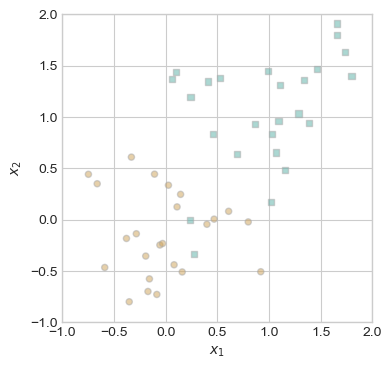

In [117]:
torch.manual_seed(1234)
X, y = perceptron_data(n_points = 50, noise = 0.5, p_dims = 2)
fig, ax = plt.subplots(1, 1, figsize = (4, 4))
ax.set(xlim = (-1, 2), ylim = (-1, 2))
plot_perceptron_data(X, y, ax)

In [118]:
p = Perceptron() 
opt = PerceptronOptimizer(p)

loss = 1.0

# for keeping track of loss values
loss_vec = []

n = X.size()[0]
maxIterations = 1000
currIteration = 0

while loss > 0 and currIteration < maxIterations: # dangerous -- only terminates if data is linearly separable
    
    # not part of the update: just for tracking our progress    
    loss = p.loss(X, y) 
    loss_vec.append(loss)
    
    # pick a random data point
    i = torch.randint(n, size = (1,))
    x_i = X[[i],:]
    y_i = y[i]
    
    # perform a perceptron update using the random data point
    opt.step(x_i, y_i)
    currIteration += 1

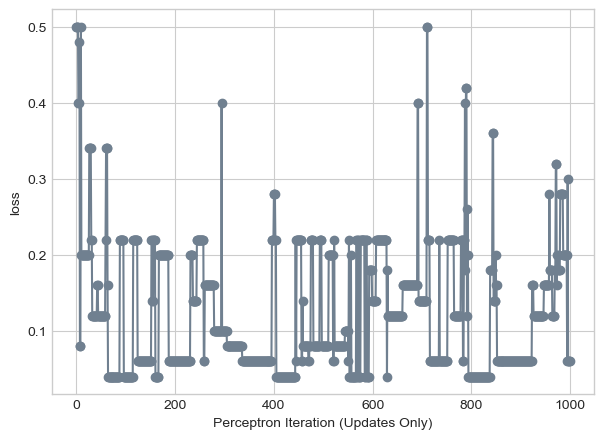

In [119]:
plt.plot(loss_vec, color = "slategrey")
plt.scatter(torch.arange(len(loss_vec)), loss_vec, color = "slategrey")
labs = plt.gca().set(xlabel = "Perceptron Iteration (Updates Only)", ylabel = "loss")

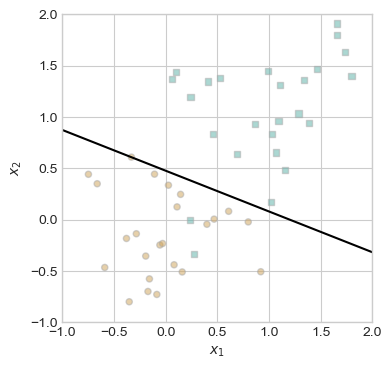

In [120]:
fig, ax = plt.subplots(1, 1, figsize = (4, 4))
ax.set(xlim = (-1, 2), ylim = (-1, 2))
plot_perceptron_data(X, y, ax)
draw_line(p.w, -1, 2, ax, color = "black")

## Using 5D linearly separable data:

In [121]:
torch.manual_seed(1234)
X, y = perceptron_data(n_points = 50, noise = 0.1, p_dims = 5)

In [122]:
p = Perceptron() 
opt = PerceptronOptimizer(p)

loss = 1.0

# for keeping track of loss values
loss_vec = []

n = X.size()[0]
maxIterations = 1000
currIteration = 0

while loss > 0 and currIteration < maxIterations: # dangerous -- only terminates if data is linearly separable
    
    # not part of the update: just for tracking our progress    
    loss = p.loss(X, y) 
    loss_vec.append(loss)
    
    # pick a random data point
    i = torch.randint(n, size = (1,))
    x_i = X[[i],:]
    y_i = y[i]
    
    # perform a perceptron update using the random data point
    opt.step(x_i, y_i)
    currIteration += 1

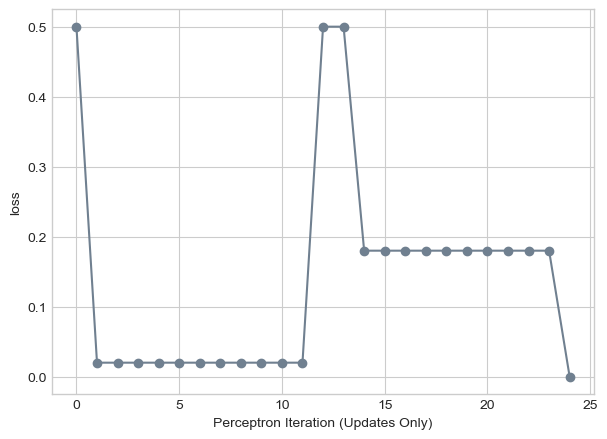

In [123]:
plt.plot(loss_vec, color = "slategrey")
plt.scatter(torch.arange(len(loss_vec)), loss_vec, color = "slategrey")
labs = plt.gca().set(xlabel = "Perceptron Iteration (Updates Only)", ylabel = "loss")

## Part C: Minibatch Perceptron

In [124]:
from minibatchperceptron import MiniBatchPerceptron, MiniBatchPerceptronOptimizer

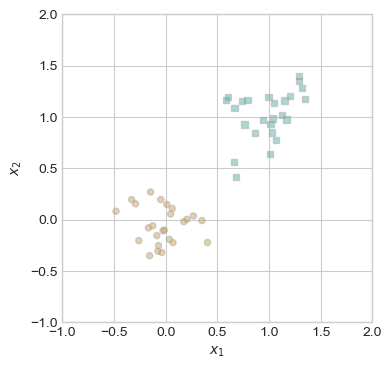

In [274]:
torch.manual_seed(1234)
X, y = perceptron_data(n_points = 50, noise = 0.22, p_dims = 2)
fig, ax = plt.subplots(1, 1, figsize = (4, 4))
ax.set(xlim = (-1, 2), ylim = (-1, 2))
plot_perceptron_data(X, y, ax)

In [329]:
def training_loop(k, a, p, opt):
    
    loss = 1.0

    # for keeping track of loss values
    loss_vec = []

    n = X.size()[0]
    maxIterations = 10000
    currIteration = 0

    while loss > 0 and currIteration < maxIterations: # dangerous -- only terminates if data is linearly separable
        
        # not part of the update: just for tracking our progress    
        loss = p.loss(X, y) 
        loss_vec.append(loss)
        
        # pick a random group of data points
        ix = torch.randperm(X.size(0))[:k]
        x_ix = X[ix,:]
        y_ix = y[ix]
        
        # perform a perceptron update using the random data point
        opt.step(x_ix, y_ix, a, k)
        currIteration += 1
    return loss_vec

In [276]:
p = MiniBatchPerceptron() 
opt = MiniBatchPerceptronOptimizer(p)
loss_vec = training_loop(1,1, p, opt)

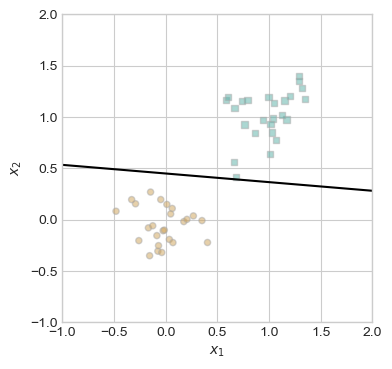

In [277]:
fig, ax = plt.subplots(1, 1, figsize = (4, 4))
ax.set(xlim = (-1, 2), ylim = (-1, 2))
plot_perceptron_data(X, y, ax)
draw_line(p.w, -1, 2, ax, color = "black")

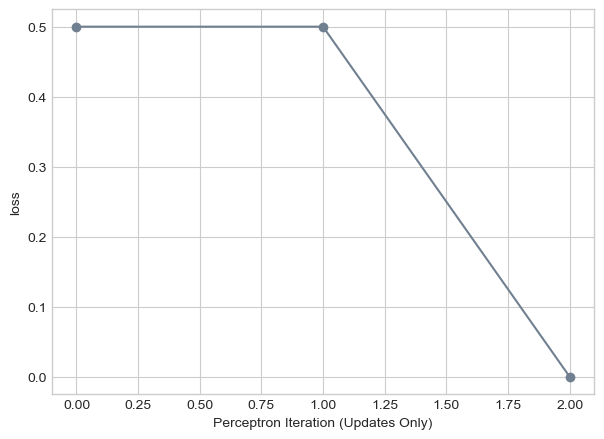

In [278]:
plt.plot(loss_vec, color = "slategrey")
plt.scatter(torch.arange(len(loss_vec)), loss_vec, color = "slategrey")
labs = plt.gca().set(xlabel = "Perceptron Iteration (Updates Only)", ylabel = "loss")

In [294]:
p = MiniBatchPerceptron() 
opt = MiniBatchPerceptronOptimizer(p)
loss_vec = training_loop(10,3, p, opt)

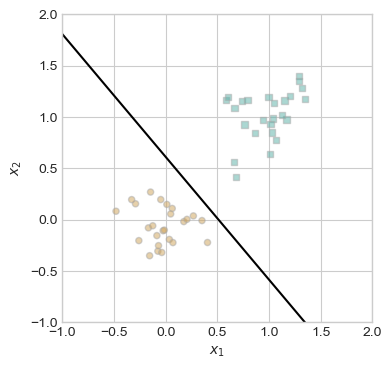

In [295]:
fig, ax = plt.subplots(1, 1, figsize = (4, 4))
ax.set(xlim = (-1, 2), ylim = (-1, 2))
plot_perceptron_data(X, y, ax)
draw_line(p.w, -1, 2, ax, color = "black")

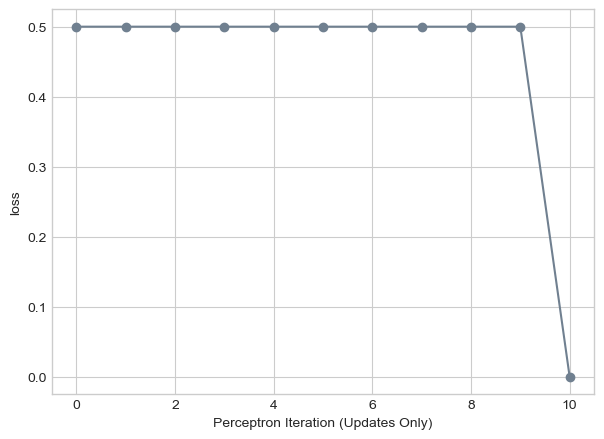

In [296]:
plt.plot(loss_vec, color = "slategrey")
plt.scatter(torch.arange(len(loss_vec)), loss_vec, color = "slategrey")
labs = plt.gca().set(xlabel = "Perceptron Iteration (Updates Only)", ylabel = "loss")

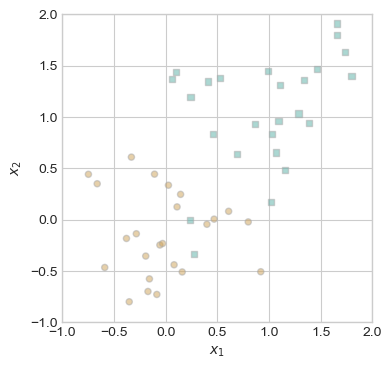

In [297]:
torch.manual_seed(1234)
X, y = perceptron_data(n_points = 50, noise = 0.5, p_dims = 2)
fig, ax = plt.subplots(1, 1, figsize = (4, 4))
ax.set(xlim = (-1, 2), ylim = (-1, 2))
plot_perceptron_data(X, y, ax)

In [330]:
p = MiniBatchPerceptron() 
opt = MiniBatchPerceptronOptimizer(p)
loss_vec = training_loop(50,0.0001, p, opt)

tensor([ 1.,  1., -1.,  1.,  1., -1.,  1.,  1., -1., -1.,  1.,  1.,  1.,  1.,
         1., -1., -1.,  1., -1.,  1., -1.,  1., -1., -1., -1.,  1., -1.,  1.,
        -1., -1.,  1., -1., -1.,  1., -1., -1., -1.,  1.,  1., -1., -1.,  1.,
         1., -1., -1.,  1., -1.,  1.,  1., -1.])
tensor([ 1., -1.,  1., -1.,  1.,  1., -1.,  1.,  1., -1., -1.,  1., -1., -1.,
        -1., -1.,  1., -1.,  1.,  1.,  1.,  1.,  1., -1.,  1., -1.,  1.,  1.,
        -1.,  1.,  1.,  1., -1., -1.,  1.,  1.,  1., -1., -1., -1.,  1.,  1.,
        -1., -1., -1., -1., -1.,  1., -1., -1.])
tensor([-1.,  1.,  1., -1., -1.,  1.,  1.,  1., -1., -1., -1., -1.,  1.,  1.,
        -1.,  1., -1.,  1., -1.,  1., -1., -1.,  1., -1.,  1.,  1., -1.,  1.,
        -1., -1.,  1.,  1.,  1., -1.,  1.,  1., -1.,  1., -1.,  1., -1., -1.,
         1., -1., -1., -1.,  1.,  1.,  1., -1.])
tensor([ 1.,  1.,  1.,  1.,  1., -1., -1.,  1.,  1.,  1., -1.,  1., -1.,  1.,
         1., -1.,  1., -1.,  1.,  1., -1.,  1., -1.,  1., -1., -1.,  1., 

KeyboardInterrupt: 

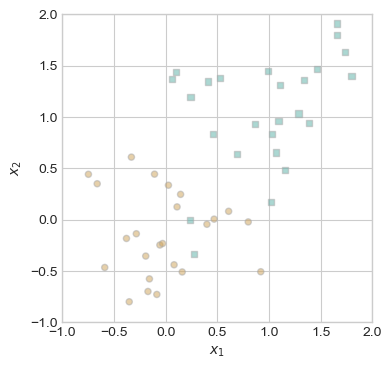

In [328]:
fig, ax = plt.subplots(1, 1, figsize = (4, 4))
ax.set(xlim = (-1, 2), ylim = (-1, 2))
plot_perceptron_data(X, y, ax)
draw_line(p.w, -1, 2, ax, color = "black")

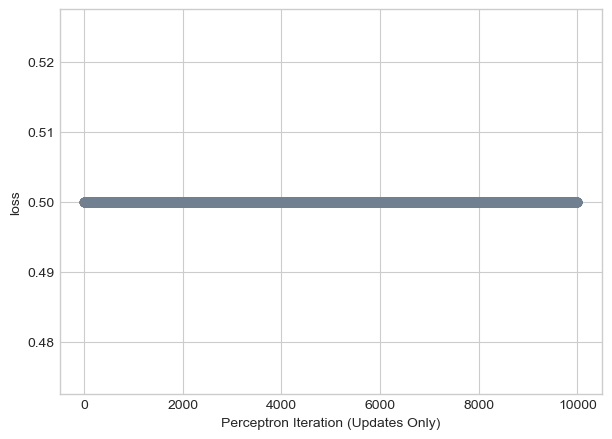

In [325]:
plt.plot(loss_vec, color = "slategrey")
plt.scatter(torch.arange(len(loss_vec)), loss_vec, color = "slategrey")
labs = plt.gca().set(xlabel = "Perceptron Iteration (Updates Only)", ylabel = "loss")